In [7]:
# Load the token
import warnings
warnings.filterwarnings('ignore')

import qiskit
from qiskit import IBMQ
import os
API_TOKEN = os.environ.get('IBM_Q_TOKEN')
IBMQ.save_account(API_TOKEN)

In [8]:
# Check version

qiskit.__version__

'0.9.0'

In [9]:
# Check versions of all qiskit elements

qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-aqua': '0.6.0',
 'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.2'}

## ELEMENTS

> AER:  handles simulator backends

## Classical Register

In [10]:
from qiskit import ClassicalRegister
c = ClassicalRegister(2)
print(c[0])
print(c[1])

Clbit(ClassicalRegister(2, 'c0'), 0)
Clbit(ClassicalRegister(2, 'c0'), 1)


## Quantum Register

In [11]:
from qiskit import QuantumRegister
q = QuantumRegister(2)
print(q[0])
print(q[1])

Qubit(QuantumRegister(2, 'q0'), 0)
Qubit(QuantumRegister(2, 'q0'), 1)


## Connecting Quantum and Classical Registers

In [12]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(q, c)

## Visualization

In [13]:
qc.measure(q,c)
print(qc)

         ┌─┐   
q0_0: |0>┤M├───
         └╥┘┌─┐
q0_1: |0>─╫─┤M├
          ║ └╥┘
 c0_0: 0 ═╩══╬═
             ║ 
 c0_1: 0 ════╩═
               


In [19]:
from qiskit.tools.visualization import circuit_drawer as draw
draw(qc)
## TODO
# diagram = circuit_drawer(qc, filename="my_first_quantum_circuit.png")

# Hadamard Gate

In [20]:
## TODO
qc.h(q[1])

## X Gate (Pauli X Gate)

In [21]:
qc.x(q[0])

## Y Gate (Pauli Y Gate)

In [22]:
qc.y(q[0])

## Z Gate (Pauli z Gate)

In [23]:
qc.z(q[0])

## CNOT Gate (CX Gate)

In [24]:
qc.cx(q[0], q[1])

In [44]:
import matplotlib.pyplot as plt

def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()

### Execute locally

In [48]:
# execute circuit and either display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("simulation: ", result_sim, result_counts)
    
    if draw_circuit: # draw the circuit
        draw(qc)
    else: # or show the results
        show_results(result_counts)

### Execute remotely

In [54]:
from qiskit.providers.ibmq import least_busy
import time
# Compile and run on a real device backend
def execute_remotely(qc, draw_circuit=False):
    if draw_circuit: # draw the circuit
        draw(qc)
    try:
        # select least busy available device and execute.
        least_busy_device = least_busy(IBMQ.backends(simulator=False))
        print("Running on current least busy device: ", least_busy_device)

        # running the job
        job_exp = execute(qc, backend=least_busy_device, shots=1024, max_credits=10)

        lapse, interval = 0, 10
        while job_exp.status().name != 'DONE':
            print('Status @ {} seconds'.format(interval * lapse))
            print(job_exp.status())
            time.sleep(interval)
            lapse += 1
        print(job_exp.status())
        exp_result = job_exp.result()
        result_counts = exp_result.get_counts(qc)

        # Show the results
        print("experiment: ", exp_result, result_counts)
        if not draw_circuit: # show the results
            show_results(result_counts)
    except:
        print("All devices are currently unavailable.")

In [51]:
# Try both commands:

import warnings
warnings.filterwarnings('ignore')
from qiskit import Aer
from qiskit import execute
execute_locally(qc,draw_circuit=True)

No measurements in circuit "circuit0": count data will return all zeros.


simulation:  Result(backend_name='qasm_simulator', backend_version='0.3.0', date=datetime.datetime(2019, 9, 17, 22, 26, 3, 85493), header=Obj(backend_name='qasm_simulator', backend_version='0.3.0'), job_id='6d778763-8aef-4579-92cf-832bb9a76664', metadata={'max_memory_mb': 7968, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.010238548}, qobj_id='4c0efb1f-f80d-4aea-a6ce-0336c824fcd8', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=1024)), header=Obj(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], memory_slots=2, n_qubits=2, name='circuit0', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), meas_level=2, metadata={'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 4, 'parallel_state_update': 1}, seed_simulator=2143715325, shots=1024, status='DONE', success=True, time_taken=0.010118873)], status='COMPLETED', success=True, time_taken=0.01647639274597168) {'00': 1024}


## BQP

##### BQP- bounded-error quantum polynomial time. 

##### This is a class of problems that is solvable in polynomial time in a quantum computer (with an error probability ≤ 0.33).

## Print QASM Cicuit

In [53]:
print(circuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



In [ ]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


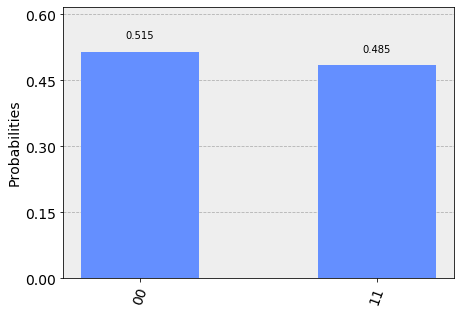

In [6]:
# Plot a histogram
plot_histogram(counts)